<a href="https://colab.research.google.com/github/MartinVIllesca/Curso-teoria-informacion/blob/master/Tarea_Capsula_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea Cápsula 0
#### EL7014 Teoría de la Información: Fundamentos y Aplicaciones <br> Information and Decision Systems Group

Nombre : Martin Valderrama Illesca

## 1. Sección Teórica

1.1. 

a) Exiplique de forma muy breve los siguientes optimizadores: 
* __SGD__: en un optimizador que actualiza los pesos solamente con la propagación del gradiente. Toma el valor del gradiente para actualizar los pesos.
* __Momentum SGD__: Agrega un término que se asocia a la historia de los gradientes, es menos sensible a grandes cambios del gradiente en un paso dependiendo de la importancia que se le dé a la historia con el valor de la constante.
* __Adagrad__: Adagrad considera un gradiente adaptivo, más bien, una actualización que pueda ser adaptiva a medida que va transcurriendo el entrenamiento. LA característica adaptiva del optimizador se relaciona con la frecuencia con que los pesos son modificados: un peso que es frecuentemente modificado no se modifica de forma considerable cada vez que se actualiza, pero un peso que es pocas veces modificado, sus modificaciones son mayores. La idea detrás de esto, es que permite que neuronas que son pocas veces actualizadas, lo sean en mayor medida cada vez, y así poder alcanzar un 
* __RMSProp__: es un método de optimización que trata de resolver el problema del decaimiento de la tasa de aprendizaje de Adagrad, esto lo hace mediante la división de la tasa de aprendizaje de Adagrad por un promedio que decae de forma exponencial de los cuadrados de los gradientes.
* __Adam__: Es un método que combina lo mejor de los optimizadores Adagrad y momentum. Si el méétodo del momentum es como si una bola rodara hacia el míínimo de la superficie con inercia, Adam es una bola con incercia y fricción.

**Nota:** Puede encontrar información útil en la siguiente fuente https://www.deeplearningbook.org/contents/optimization.html pag 290.

b) Explique a grandes rasgos las capas convolucionales y como influyen sus parámetros *stride* y *padding* tanto para el cálculo operacional como para la salida de la capa.

Las capas convolucionates son las capas que "filtran" las imágenes que entran a la misma capa. La operación consiste en pasar sobre la imagen un filtro de tamaño fijo, donde sus pesos son optimizables a través del entrenamiento de la red. El _stride_ es la cantidad de pixeles que la red se salta al mover el filtro sobre la imagen. El _padding_ es la cantidad de pixeles que se añaden a la imagen de entrada para poder operar el filtro en los bordes de la imagen, puede ser _zero padding_ o duplicar el valor del pixel del borde.

Finalmente, estas operaciones tienen el efecto de modificar la salida de la capa convolucional, donde el tamaño de la imagen puede ser inferior al de la imagen de entrada (y generalmente lo es). Donde, por ejemplo, si no hay _padding_ y hay un _stride_ de 1, además se ocupa un filtro de $3\times3$; se obtendrá una imagen de salida igual a $n-2 \times n-2$, ya que el filtro se salta los pixeles de los bordes. El stride implica que la imagen resultante reduce su tamaño al dividido por el stride, es decir, si tiene $28 \times 28$ se reduce, con un stride de 2 a $14 \times 14$

**Nota:** Revisar la documentacion del modulo torch.nn.Conv2d en https://pytorch.org/docs/stable/nn.html

1.2.

Las redes neuronales pueden ser modeladas como una distribucion de probabilidad parametrizada por los pesos de la red como $T_w(x) \sim p_w(y|x)$ .
Asuma que la red neuronal tiene una funcion de salida tal que siempre su salida esta normalizada, i.e $\sum_{i=1}^C p_w(y_i|x) = 1$.<br><br>

a) Considere que dispone de $(x_i,y_i)_{i=1}^N$ datos *i.i.d.* como datos de entrenamiento. Plantee el problema de aprendizaje de una red neuronal en clasificación con el estimador de máxima verosimilitud y explicite el problema de optimización asociado. Explique intuitivamente porqué esta función objetivo permitiría tener un buen desempeño en clasificación.<br><br>

b) Sea $p(y|x)$ la distribucion real de las clases con respecto a los posible sujetos a clasificar. Utilice la Divergencia K-L para plantear el problema de aprendizaje de la red neuronal como aproximar la distribucion $p(y|x)$ con la red neuronal $T_w(x) \sim p_w(y|x)$ y explicite el problema de optimización asociado. ¿Que argumento teórico sustenta la utilización de la Divergencia K-L para plantear el problema?.
**Hint:** La divergencia K-L no es simétrica y por tanto existe una version que permite descartar terminos en el problema de optimización.<br><br>

c) Muestre que el problema de optimización asociado en el planteamiento a) es equivalente al problema de optimizacion asociado al planteamiento b). **Hint:** utilice una funcion monotona creciente bien definida entre (0,1] en la funcion objetivo del planteamiento a) para evidenciar la equivalencia entre problemas de optimizacion.

## 2. Sección Práctica



Plantee una arquitectura de red neuronal para resolver el problema de clasificacion de MNIST que cumpla con los siguientes requisitos:

* Al menos 2 capas convolucionales.
* Capas de Pooling.
* Uso del método flatten para colapsar las matrices de caracteristicas a un vector.
* Últimas capas equivalentes a una MLP (desde el flatten en adelante).

Luego entrene la arquitectura con almenos 3 optimizadores distintos y cada uno de ellos con almenos 3 set de parámetros distintos (learning rate u otro parámetro que el optimizador posea).

Reporte las curvas de Loss v/s Epoch y Accuracy v/s Epoch, luego comente muy brevemente el comportamiento de las curvas.

**Hint:** Se recomienda escribir la clase de su red convolucional como la seccion Harcoding way de la capsula 0 dado que utilizará la misma durante todas las pruebas.

### Imports

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import matplotlib.pyplot as plt
from matplotlib import cm

from skimage import io

import numpy as np 

print(torch.__version__)

1.4.0


In [0]:
# Asegurarse que Colab les asignó un entorno con GPU si la desean usar para entrenamiento
!nvidia-smi

Mon Apr 13 02:33:51 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8     8W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

### Descargando MNIST

MNIST es una base de datos de imagenes en blanco y negro de 28x28 pixeles, por tanto se consideran como imagenes de solo 1 canal (tonalidad de grises). Existen otras bases de datos que contienen imagenes RGB que utilizan 3 canales.

**Dato curioso:** Existen problemas de analisis de secciones saguitales del cerebro en blanco y negro que para efectos de la red consideran cada imagen de la secuencia como un canal del tensor de entrada.

In [0]:
train_dataset = datasets.MNIST(root='./', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ]))

val_dataset = datasets.MNIST(root='./', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ]))

print(train_dataset.data.shape)
print(val_dataset.data.shape)


torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


### Creando Loaders

In [0]:
train_batch_size = 100
val_batch_size   = 1000

train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size = train_batch_size)
val_loader = torch.utils.data.DataLoader(val_dataset,
                                          batch_size = val_batch_size)

Aqui se realiza una visualizacion de las dimensiones del tensor de entrada a nuestra red. Verificar que el orden de las dimensiones coincida con las dimensiones esperadas por los modulos convolucionales.

In [0]:
target_example, input_example = train_dataset[0]
print(target_example.shape)

torch.Size([1, 28, 28])


### Definiendo la arquitectura de la red

In [0]:
class my_first_convnet(nn.Module):
  def __init__(self):
        super(my_first_convnet, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, kernel_size=3, stride=1)
        self.pool = nn.MaxPool2d(3, stride=2)
        self.conv2 = nn.Conv2d(3, 3, kernel_size=3, stride=1)

        self.fc1 = nn.Linear(3 * 4 * 4, 100)
        self.fc2 = nn.Linear(100, 10)

        self.soft = nn.LogSoftmax(dim=1)

        ## Inserte Modulo con Parámetros aqui ##
  
  def forward(self, x):
    x = self.conv1(x)
    x = self.pool(nn.functional.relu(x))
    x = self.conv2(x)
    x = self.pool(nn.functional.relu(x))
    # print(x.shape)
    x = x.reshape(-1, 3 * 4 * 4)
    # print(x.shape)
    x = nn.functional.relu(self.fc1(x))
    x = self.fc2(x)
    x = self.soft(x)

    ## Defina la función forward aqui ##
    
    return x

In [0]:
a = torch.randn(4,4)
print(a)
print(a.view(-1))

tensor([[ 0.6791, -0.2645, -1.1198, -1.1330],
        [ 0.8822,  0.7428, -1.3190, -0.8530],
        [ 0.4056, -0.6439,  1.4110,  0.1763],
        [-0.8320, -0.2660,  0.1006,  1.4759]])
tensor([ 0.6791, -0.2645, -1.1198, -1.1330,  0.8822,  0.7428, -1.3190, -0.8530,
         0.4056, -0.6439,  1.4110,  0.1763, -0.8320, -0.2660,  0.1006,  1.4759])


In [0]:
# model = my_first_convnet()
# model.cuda()
# for i, (x_b, y_b) in enumerate(train_loader):
#   x_b = x_b.cuda()
#   model.forward(x_b)
#   break

### Entrenamiento

In [0]:
def correct_labels(y_pred,target):
  pred = np.argmax(y_pred, axis=1)
  return np.sum(np.equal(pred,target))

In [0]:
epochs = 20
lr = [0.001, 0.005, 0.01]

def train(optim):
  train_loss = []
  val_loss = []

  train_acc = []
  val_acc = []

  model.cuda()
  model.train()
  for e in range(epochs):
    
    temp_val_loss = 0.0
    corrects_val = 0
    for i, (x_b,y_b) in enumerate(val_loader):
      x_b = x_b.cuda()
      y_b = y_b.cuda()

      y_pred = model.forward(x_b)

      loss = criterion(y_pred, y_b)

      corrects_val += correct_labels(y_pred.clone().detach().cpu().numpy(),
                                    y_b.clone().detach().cpu().numpy())
      
      temp_val_loss += loss.item() / len(val_loader)
      
    temp_train_loss = 0.0
    corrects_train = 0
    for i, (x_b, y_b) in enumerate(train_loader):
      x_b = x_b.cuda()
      y_b = y_b.cuda()
      
      optim.zero_grad()

      y_pred = model.forward(x_b)

      loss = criterion(y_pred, y_b)

      loss.backward()
      optim.step()

      corrects_train += correct_labels(y_pred.clone().detach().cpu().numpy(),
                                    y_b.clone().detach().cpu().numpy())
      
      temp_train_loss += loss.item() / len(train_loader)
    
      
    train_loss.append(temp_train_loss)
    val_loss.append(temp_val_loss)

    train_acc.append(corrects_train / len(train_loader.dataset))
    val_acc.append(corrects_val / len(val_loader.dataset))

    print('Epoch {:3d} ||Train Loss : {:5.3f} ||Val Loss : {:5.3f} ||Acc : {:5.3f}'.format(e+1, temp_train_loss, temp_val_loss, corrects_val / len(val_loader.dataset)))
  
  return [train_loss, val_loss, train_acc, val_acc]


In [0]:
# primer optimizador SGD
criterion = nn.NLLLoss()

SGD_loss = []
SGD_acc = []

for lr_ in lr:
  print('entrenamiento con SGD lr = {}'.format(lr_))
  model = my_first_convnet()
  optimizador = torch.optim.SGD(model.parameters(), lr=lr_)
  train_loss, val_loss, train_acc, val_acc = train(optimizador)

  SGD_loss.append([train_loss, val_loss])
  SGD_acc.append([train_acc, val_acc])


entrenamiento con SGD lr = 0.001
Epoch   1 ||Train Loss : 2.298 ||Val Loss : 2.304 ||Acc : 0.150
Epoch   2 ||Train Loss : 2.286 ||Val Loss : 2.292 ||Acc : 0.215
Epoch   3 ||Train Loss : 2.270 ||Val Loss : 2.279 ||Acc : 0.238
Epoch   4 ||Train Loss : 2.239 ||Val Loss : 2.257 ||Acc : 0.261
Epoch   5 ||Train Loss : 2.168 ||Val Loss : 2.213 ||Acc : 0.330
Epoch   6 ||Train Loss : 1.970 ||Val Loss : 2.102 ||Acc : 0.449
Epoch   7 ||Train Loss : 1.475 ||Val Loss : 1.774 ||Acc : 0.640
Epoch   8 ||Train Loss : 0.929 ||Val Loss : 1.132 ||Acc : 0.748
Epoch   9 ||Train Loss : 0.672 ||Val Loss : 0.730 ||Acc : 0.805
Epoch  10 ||Train Loss : 0.552 ||Val Loss : 0.564 ||Acc : 0.844
Epoch  11 ||Train Loss : 0.483 ||Val Loss : 0.478 ||Acc : 0.862
Epoch  12 ||Train Loss : 0.439 ||Val Loss : 0.427 ||Acc : 0.877
Epoch  13 ||Train Loss : 0.407 ||Val Loss : 0.391 ||Acc : 0.887
Epoch  14 ||Train Loss : 0.382 ||Val Loss : 0.364 ||Acc : 0.895
Epoch  15 ||Train Loss : 0.362 ||Val Loss : 0.341 ||Acc : 0.902
Epoch  

In [0]:
# segundo optimizador RMSprop
criterion = nn.NLLLoss()

RMSprop_loss = []
RMSprop_acc = []

for lr_ in lr:
  print('entrenamiento con RMSprop lr = {}'.format(lr_))
  model = my_first_convnet()
  optimizador = torch.optim.RMSprop(model.parameters(), lr=lr_)
  train_loss, val_loss, train_acc, val_acc = train(optimizador)

  RMSprop_loss.append([train_loss, val_loss])
  RMSprop_acc.append([train_acc, val_acc])


entrenamiento con RMSprop lr = 0.001
Epoch   1 ||Train Loss : 0.423 ||Val Loss : 2.311 ||Acc : 0.101
Epoch   2 ||Train Loss : 0.221 ||Val Loss : 0.307 ||Acc : 0.900
Epoch   3 ||Train Loss : 0.176 ||Val Loss : 0.212 ||Acc : 0.932
Epoch   4 ||Train Loss : 0.150 ||Val Loss : 0.164 ||Acc : 0.948
Epoch   5 ||Train Loss : 0.134 ||Val Loss : 0.135 ||Acc : 0.955
Epoch   6 ||Train Loss : 0.121 ||Val Loss : 0.119 ||Acc : 0.961
Epoch   7 ||Train Loss : 0.112 ||Val Loss : 0.108 ||Acc : 0.964
Epoch   8 ||Train Loss : 0.104 ||Val Loss : 0.099 ||Acc : 0.968
Epoch   9 ||Train Loss : 0.098 ||Val Loss : 0.092 ||Acc : 0.970
Epoch  10 ||Train Loss : 0.093 ||Val Loss : 0.089 ||Acc : 0.971
Epoch  11 ||Train Loss : 0.089 ||Val Loss : 0.087 ||Acc : 0.972
Epoch  12 ||Train Loss : 0.085 ||Val Loss : 0.085 ||Acc : 0.974
Epoch  13 ||Train Loss : 0.082 ||Val Loss : 0.084 ||Acc : 0.974
Epoch  14 ||Train Loss : 0.079 ||Val Loss : 0.083 ||Acc : 0.973
Epoch  15 ||Train Loss : 0.076 ||Val Loss : 0.082 ||Acc : 0.974
Epo

In [0]:
# tercer optimizador Adam
criterion = nn.NLLLoss()

Adam_loss = []
Adam_acc = []

for lr_ in lr:
  print('entrenamiento con Adam lr = {}'.format(lr_))
  model = my_first_convnet()
  optimizador = torch.optim.Adam(model.parameters(), lr=lr_)
  train_loss, val_loss, train_acc, val_acc = train(optimizador)

  Adam_loss.append([train_loss, val_loss])
  Adam_acc.append([train_acc, val_acc])


entrenamiento con Adam lr = 0.001
Epoch   1 ||Train Loss : 0.712 ||Val Loss : 2.309 ||Acc : 0.090
Epoch   2 ||Train Loss : 0.276 ||Val Loss : 0.338 ||Acc : 0.892
Epoch   3 ||Train Loss : 0.205 ||Val Loss : 0.213 ||Acc : 0.933
Epoch   4 ||Train Loss : 0.168 ||Val Loss : 0.171 ||Acc : 0.946
Epoch   5 ||Train Loss : 0.146 ||Val Loss : 0.154 ||Acc : 0.952
Epoch   6 ||Train Loss : 0.129 ||Val Loss : 0.143 ||Acc : 0.957
Epoch   7 ||Train Loss : 0.117 ||Val Loss : 0.131 ||Acc : 0.959
Epoch   8 ||Train Loss : 0.108 ||Val Loss : 0.120 ||Acc : 0.961
Epoch   9 ||Train Loss : 0.101 ||Val Loss : 0.109 ||Acc : 0.964
Epoch  10 ||Train Loss : 0.095 ||Val Loss : 0.102 ||Acc : 0.966
Epoch  11 ||Train Loss : 0.090 ||Val Loss : 0.096 ||Acc : 0.968
Epoch  12 ||Train Loss : 0.086 ||Val Loss : 0.094 ||Acc : 0.969
Epoch  13 ||Train Loss : 0.082 ||Val Loss : 0.089 ||Acc : 0.972
Epoch  14 ||Train Loss : 0.078 ||Val Loss : 0.086 ||Acc : 0.973
Epoch  15 ||Train Loss : 0.075 ||Val Loss : 0.083 ||Acc : 0.974
Epoch 

In [0]:
def plotear(optimizador_data, titulo, ylabel):
  c = ['r', 'g', 'b']
  for i in range(3):
    aux = optimizador_data[i]
    plt.plot(aux[0], label='train lr = {}'.format(lr[i]), color=c[i])
    plt.plot(aux[1], label='val lr = {}'.format(lr[i]), color=c[i], linestyle='dashed')
  plt.title(titulo), plt.ylabel(ylabel), plt.xlabel('epochs')
  plt.legend()
  plt.show()

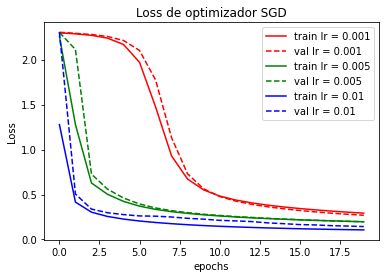

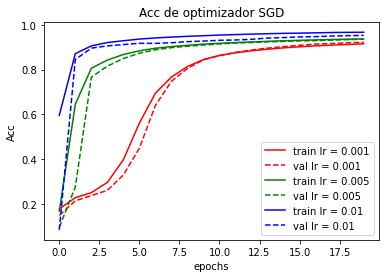

In [0]:
plotear(SGD_loss, 'Loss de optimizador SGD', 'Loss')
plotear(SGD_acc, 'Acc de optimizador SGD', 'Acc')

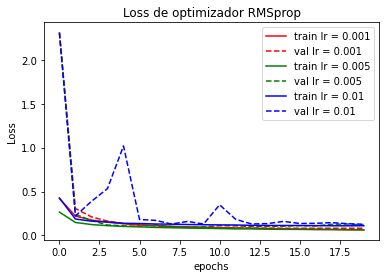

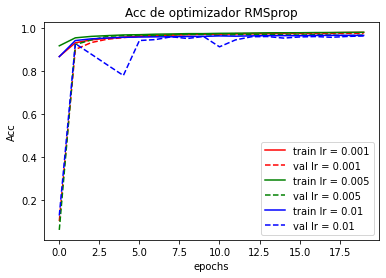

In [0]:
plotear(RMSprop_loss, 'Loss de optimizador RMSprop', 'Loss')
plotear(RMSprop_acc, 'Acc de optimizador RMSprop', 'Acc')

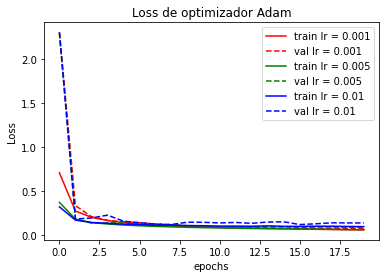

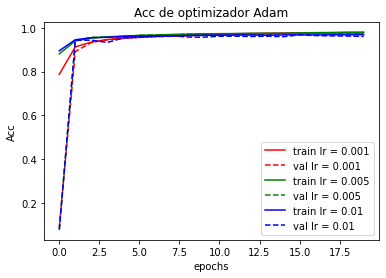

In [0]:
plotear(Adam_loss, 'Loss de optimizador Adam', 'Loss')
plotear(Adam_acc, 'Acc de optimizador Adam', 'Acc')

Se puede ver con los gráficos anteriores, que el método que mejor y máás ráápido entrena la red, es el con el optimizador Adam. Luego le viene el RMSprop y el que tiene peor rendimiento y máás lento es SGD, lo que se esperaba de este experimento.

El comportamiento del loss de RMSprop y Adam son muy parecidos, sin embargo, este depende del experimento en que se utilice y el dataset que se use, por lo que no se puede decir a ciencia cierta que uno sea mejor que el otro de forma general.